<a href="https://colab.research.google.com/github/DimaKav/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/module3-make-explanatory-visualizations/LS_DS_223_Make_explanatory_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make explanatory visualizations




Tody we will reproduce this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

In [0]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Objectives
- add emphasis and annotations to transform visualizations from exploratory to explanatory
- remove clutter from visualizations

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

## Make prototypes

This  helps us understand the problem

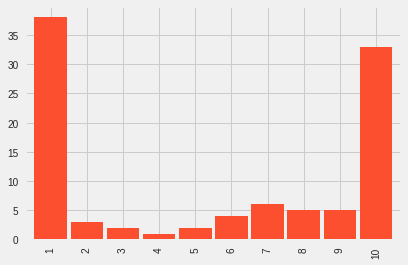

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

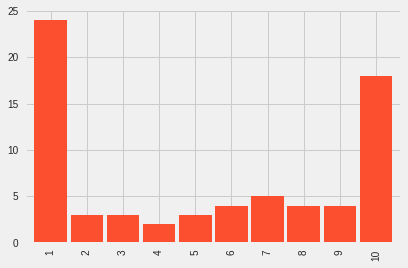

In [0]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

## Annotate with text

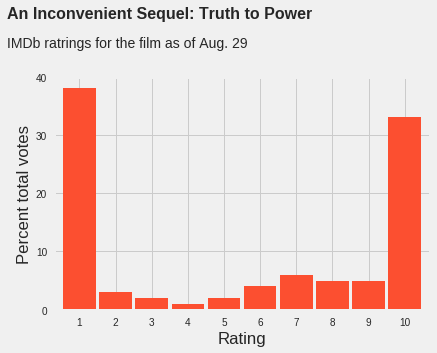

In [0]:
plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

ax = fake.plot.bar(color='C1', width=0.9);

ax.tick_params(labelrotation=0)

ax.text(x=-2, y=50, s='An Inconvenient Sequel: Truth to Power',
        fontsize=16, fontweight='bold')

ax.text(x=-2, y=45, s='IMDb ratrings for the film as of Aug. 29');

ax.set(xlabel='Rating',
       ylabel='Percent total votes',
       yticks=range(0,50,10));

## Reproduce with real data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [0]:
df = df.set_index('timestamp')
final = df.tail(1)
columns = [str(i) + '_pct' for i in range(1,11)]
final[columns]

data = final[columns].T

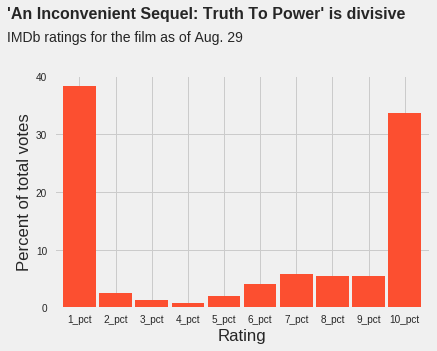

In [0]:
plt.style.use('fivethirtyeight')

ax = data.plot.bar(color='C1', width=0.9, legend=False)

ax.tick_params(labelrotation=0)

ax.text(x=-2, y=50, s="'An Inconvenient Sequel: Truth To Power' is divisive", 
        fontsize=16, fontweight='bold')

ax.text(x=-2, y=46, s='IMDb ratings for the film as of Aug. 29')

ax.set(xlabel='Rating', 
       ylabel='Percent of total votes', 
       yticks=range(0,50,10));

# ASSIGNMENT

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

# STRETCH OPTIONS

#### Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!

#### Make more charts!

Choose a chart you want to make, from [FT's Visual Vocabulary poster](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!









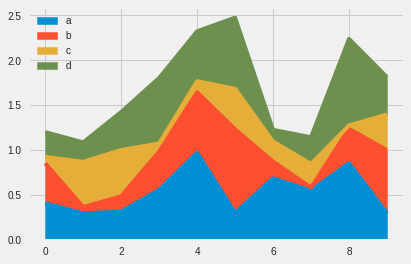

In [24]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

df.plot.area();

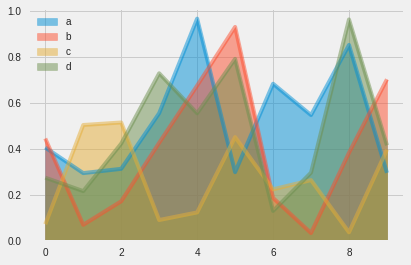

In [25]:
df.plot.area(stacked=False);

In [0]:
# Let's try a scatter matrix plot

from pandas.plotting import scatter_matrix
  
df_n = pd.DataFrame(np.random.randn(1000,4), columns=['a', 'b', 'c', 'd']) 

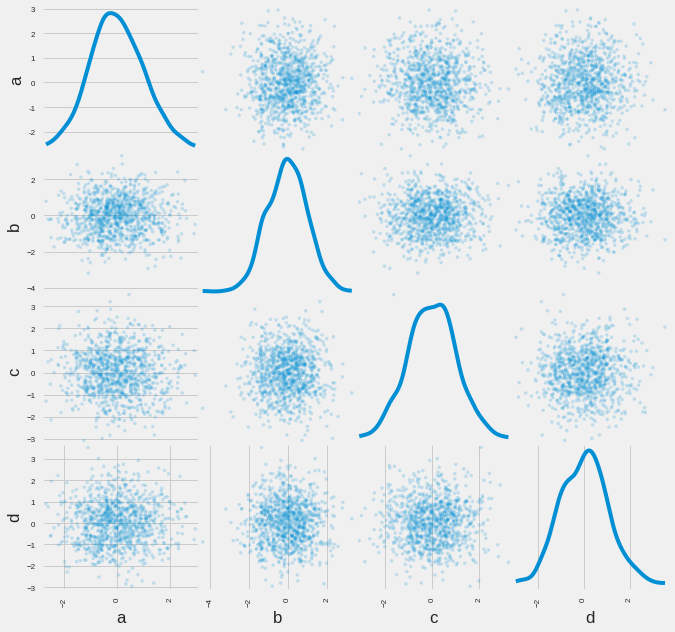

In [54]:
# Density plots are great for visualizing distribution of univariate data

# This one shows the normal distribution of random values in a 1000 x 4 matrix

scatter_matrix(df_n, alpha=0.2, figsize=(10,10), diagonal='kde');

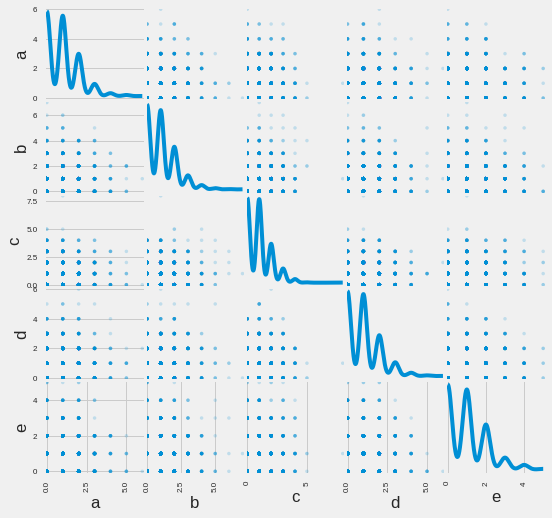

In [110]:
# This one shows poisson distribution of random values in a 2000 x 5 dataframe

df_p = pd.DataFrame(np.random.poisson(size=(2000, 5)), columns=['a','b','c','d', 'e'])


scatter_matrix(df_p, alpha=0.2, figsize=(8,8), diagonal='kde');

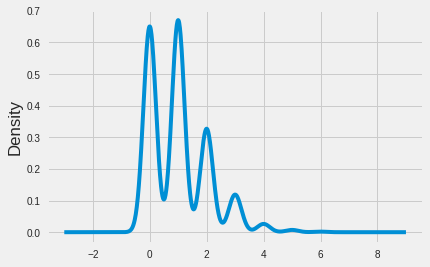

In [105]:
df_p.b.plot.kde();

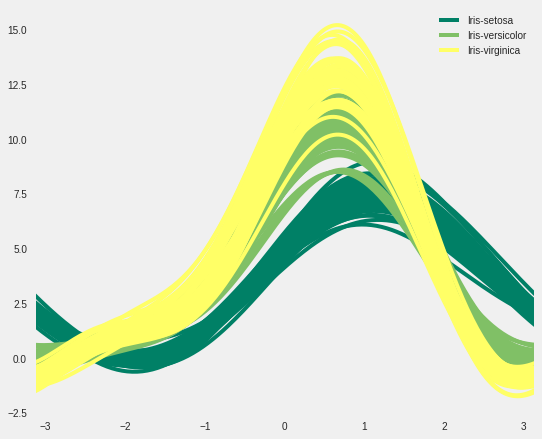

In [122]:
# Andrews curves...

from pandas.plotting import andrews_curves

data = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/data/iris.csv')
plt.figure(figsize=(8,7))
andrews_curves(data, 'Name', colormap='summer');